**IMPORTS**

In [1]:
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [9]:
import pandas as pd

df = pd.read_csv('titanic.csv.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


** Fix NaN Data Values**

In [13]:
len(np.argwhere(np.isnan(df["Age"])))

177

In [14]:
len(df["Age"])

891

In [16]:
female_age = df[df["Sex"] == "female"]["Age"]
female_age.tail()

,Age
880,25.0
882,22.0
885,39.0
887,19.0
888,NaN


In [17]:
male_age = df[df["Sex"] == "male"]["Age"]
male_age.head()

,Age
0,22.0
4,35.0
5,NaN
6,54.0
7,2.0


In [20]:
# Store median value into variable
female_median = female_age.median()
male_median = male_age.median()

# Assign age and sex into lists
age = list(df["Age"])
sex = list(df["Sex"])

In [21]:
medians = df.groupby('Sex')['Age'].median()
# Set dataframe index by sex
df = df.set_index(['Sex'])
# Fill na
df['Age'] = df['Age'].fillna(medians)
# if you want to reset the index
df = df.reset_index()

A] Percentage Deaths and Survivors

In [22]:
no_of_passengers = df.groupby("Survived").size()
no_of_passengers

,0
Survived,
0,549
1,342


In [23]:
# Total number of survivors
no_of_survivors = no_of_passengers[1]
no_of_survivors

np.int64(342)

In [24]:
# Total number of deaths
no_of_deaths = no_of_passengers[0]
no_of_deaths

np.int64(549)

In [25]:
# Percentage of total survivors and deaths
percent_of_survivors = (no_of_survivors/(no_of_survivors + no_of_deaths))*100
percent_of_deaths = (no_of_deaths/(no_of_survivors + no_of_deaths))*100
percent_of_survivors

np.float64(38.38383838383838)

In [26]:
percent_of_deaths

np.float64(61.61616161616161)

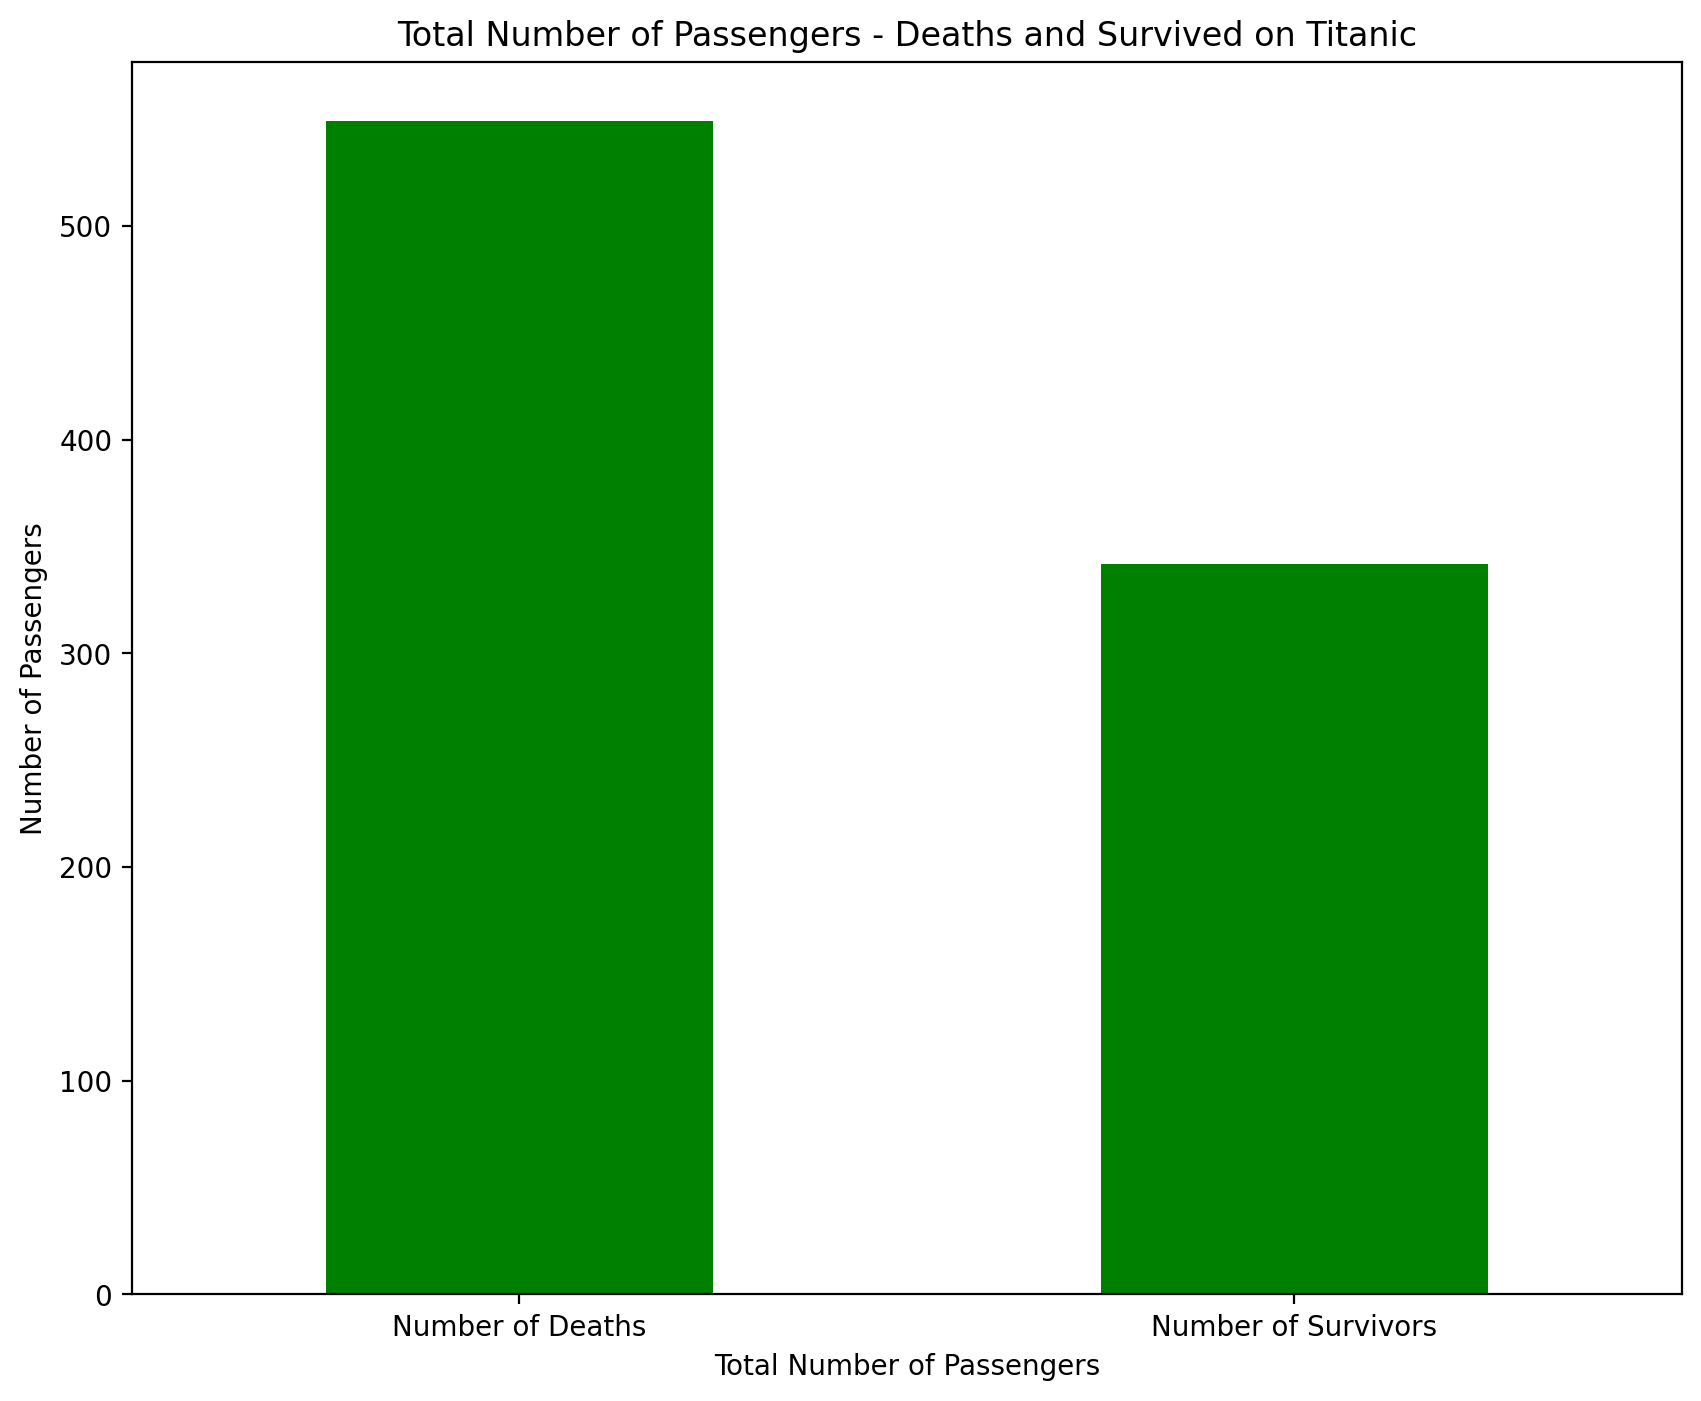

In [28]:
objects = ('Number of Deaths', 'Number of Survivors')
bars = np.arange(len(objects))
no_of_passengers.plot(kind = "bar", figsize = (10,8), color = 'g')
plt.xticks(bars, objects, rotation='horizontal')
plt.ylabel("Number of Passengers")
plt.xlabel("Total Number of Passengers")
plt.title("Total Number of Passengers - Deaths and Survived on Titanic")
plt.show()

**B] Female - Male -- Deaths and Survivors**

In [29]:
male_female = df.groupby("Sex").size()
male_female

,0
Sex,
female,314
male,577


In [32]:
survived_male_female = df.groupby(['Sex', 'Survived']).size()
survived_male_female

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

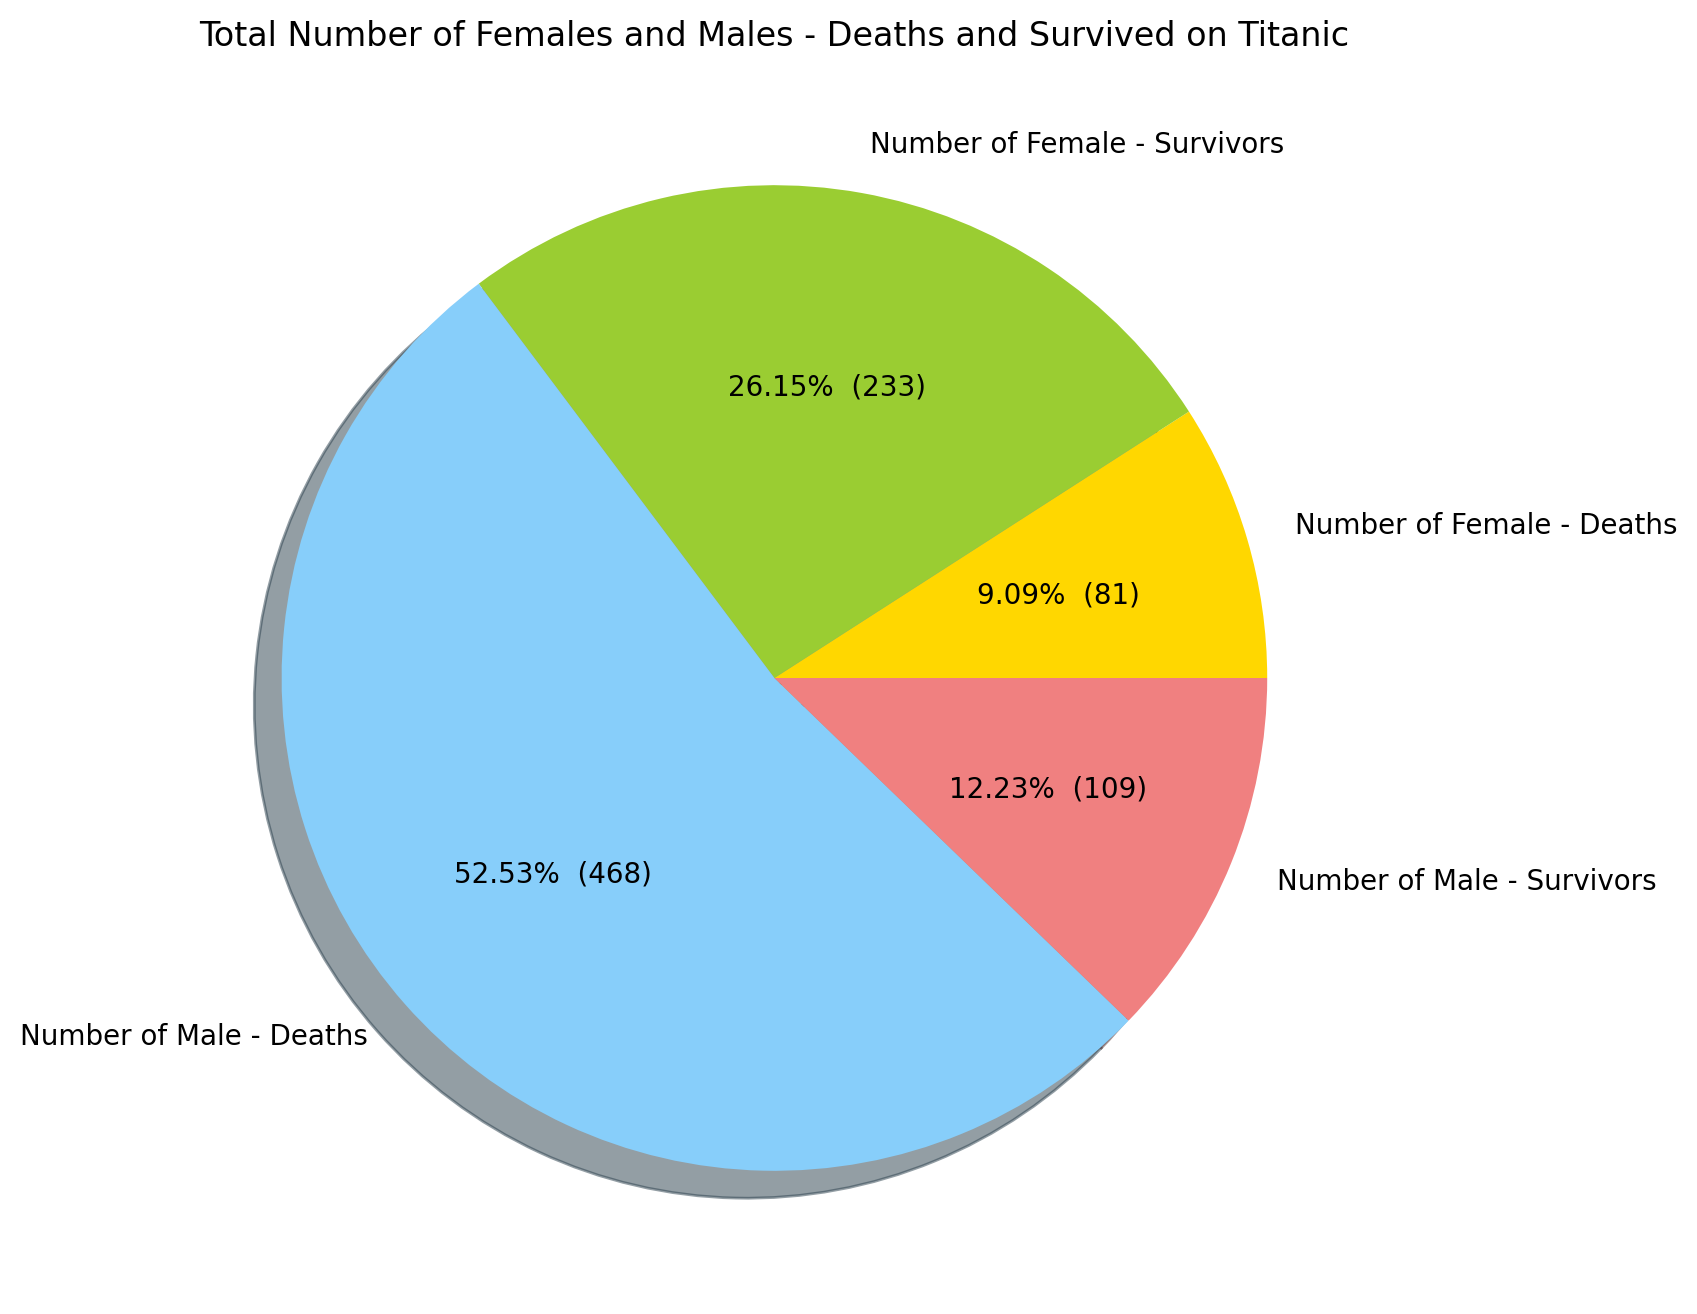

In [34]:
import matplotlib.pyplot as plt

df_survived = df.groupby(['Sex', 'Survived']).size()
df_survived = df_survived.loc[[
    ('female', 0),
    ('female', 1),
    ('male', 0),
    ('male', 1)
]]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct, v=val)
    return my_autopct

colors = ['gold', 'yellowgreen', 'lightskyblue', 'lightcoral']
labels = ['Number of Female - Deaths', 'Number of Female - Survivors', 'Number of Male - Deaths', 'Number of Male - Survivors']

plt.figure(figsize=(8, 8))
plt.pie(df_survived, shadow=True, colors=colors, labels=labels, autopct=make_autopct(df_survived))
plt.title('Total Number of Females and Males - Deaths and Survived on Titanic')
plt.show()


**C] Age of Passengers**

In [35]:
age_of_passengers = df.groupby("Age").size()
age_of_passengers.head()

,0
Age,
0.42,1
0.67,1
0.75,2
0.83,2
0.92,1


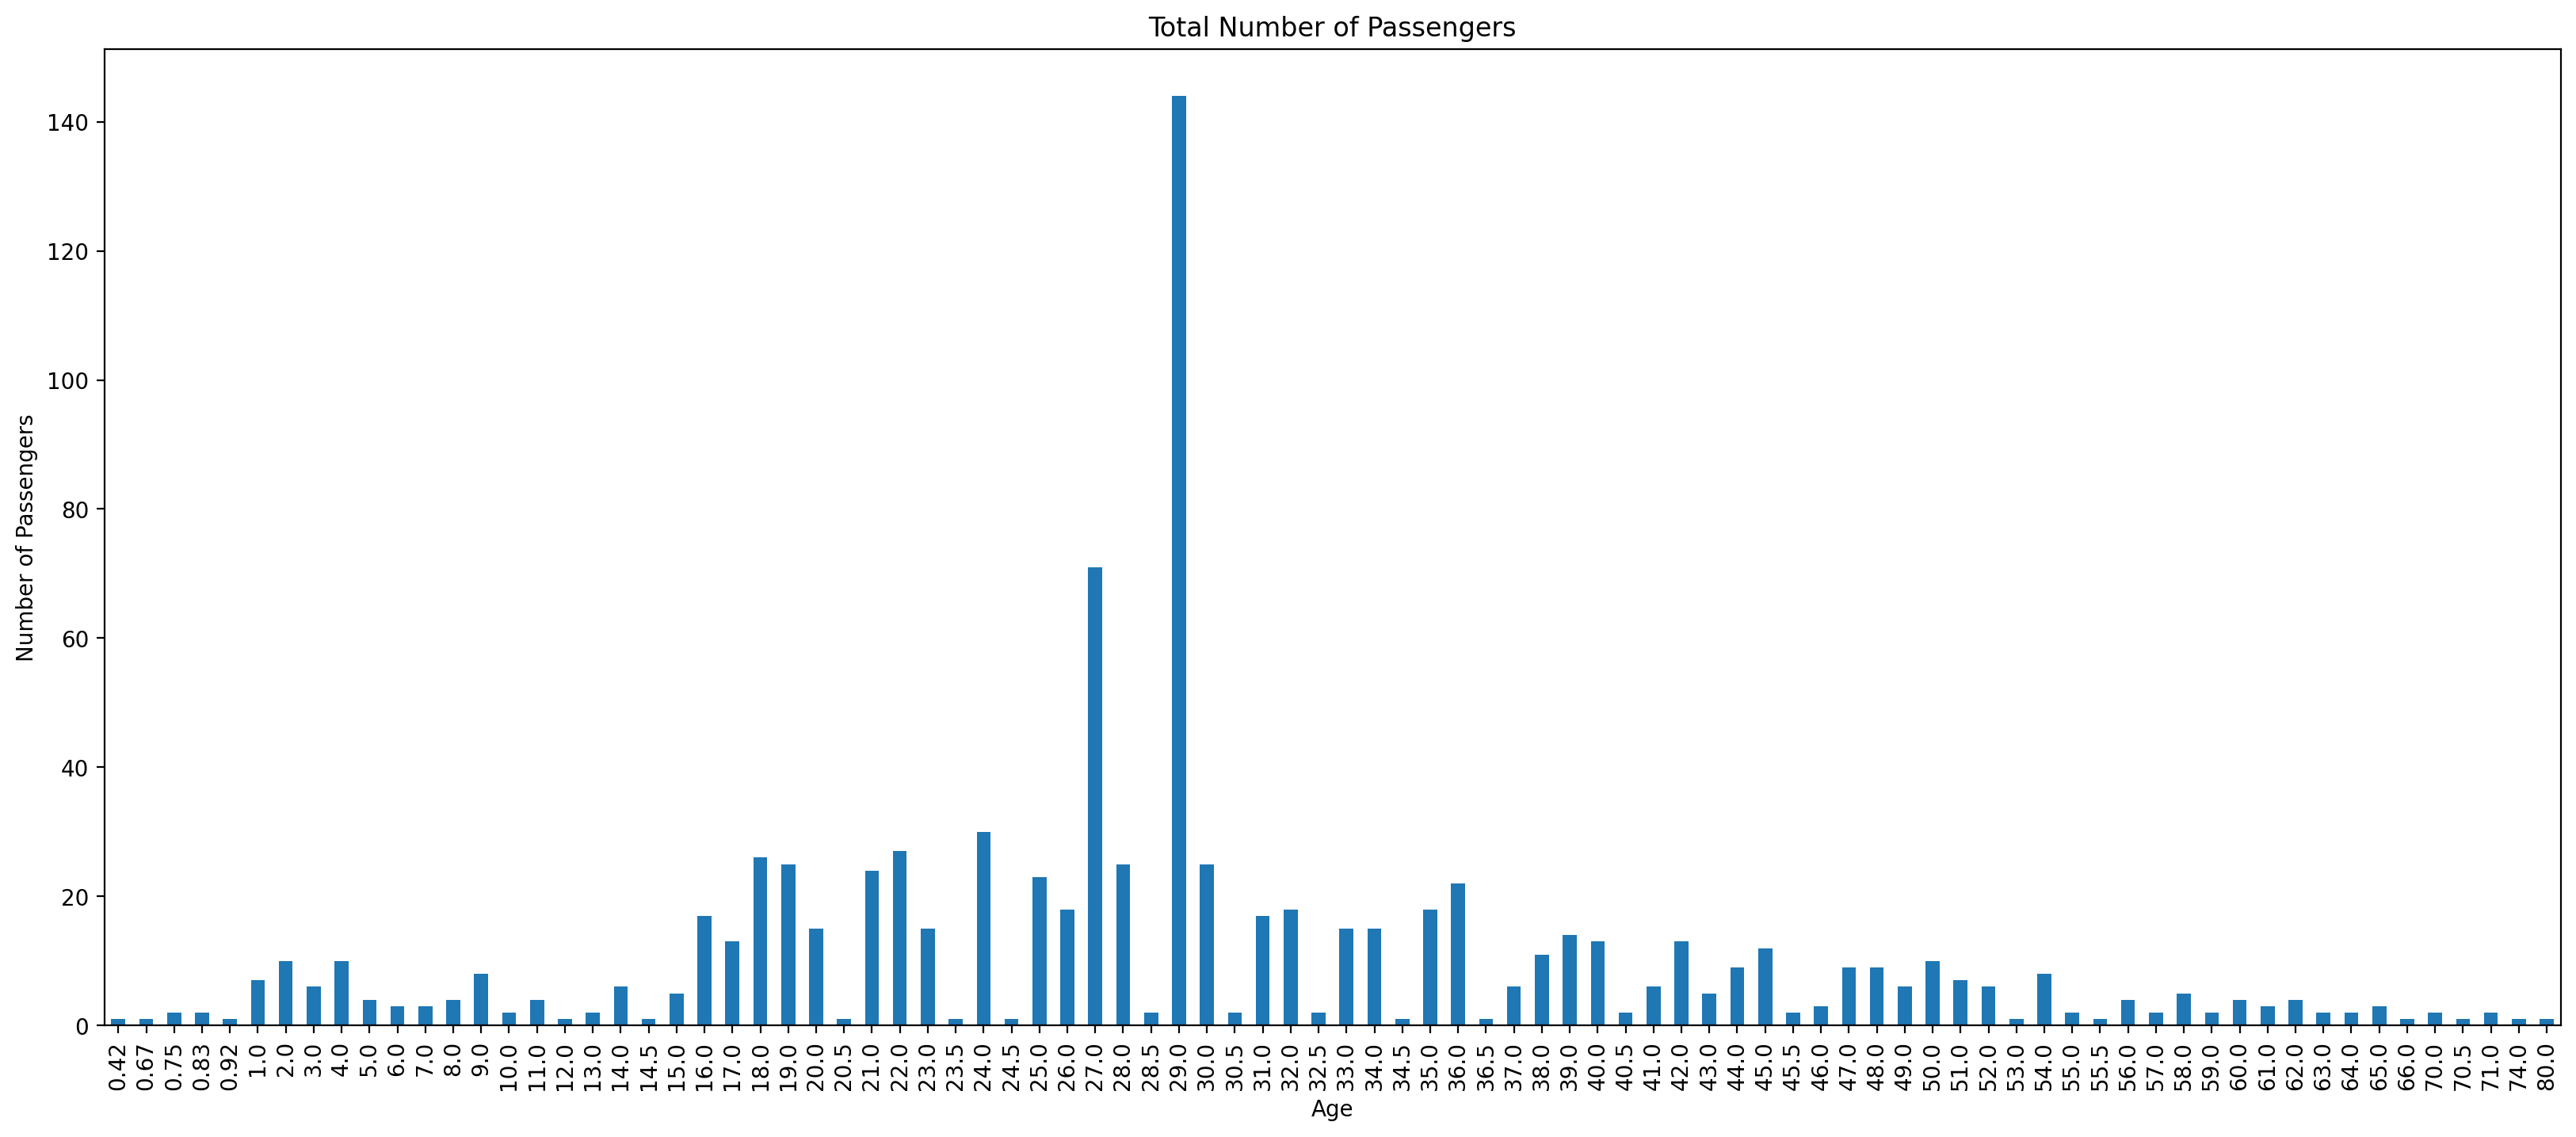

In [36]:
# Plot bar graph for Age of passengers on titanic

age_of_passengers.plot(kind = "bar", figsize = (20,8))
plt.ylabel("Number of Passengers")
plt.xlabel("Age")
plt.title("Total Number of Passengers")
plt.show()

**D] Number of Passengers Traveling with their Sibling/Spouse**

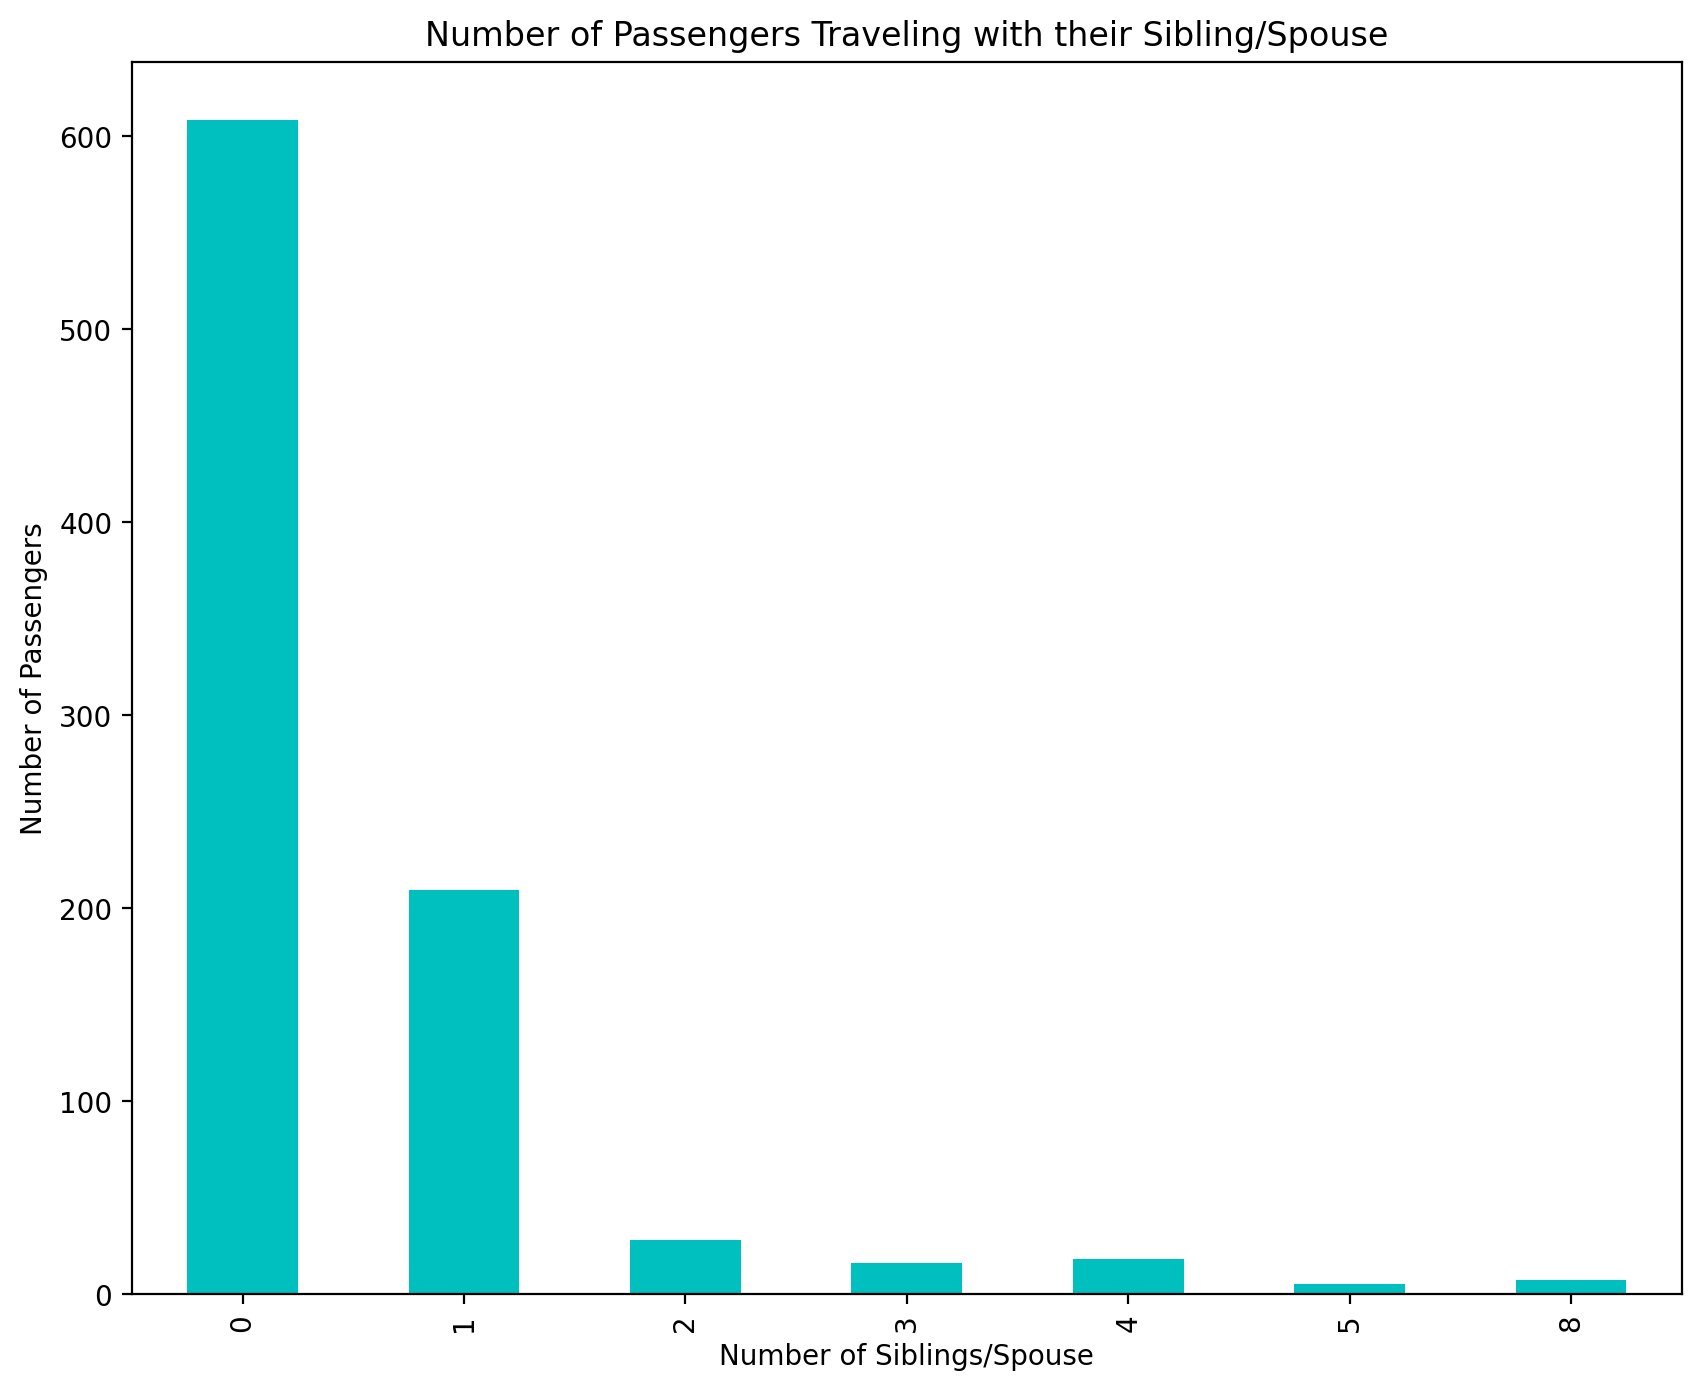

In [38]:
# Group by Sibling/Spouse Traveling with their Sibling/Spouse
sibsp = df.groupby("SibSp").size()
# Plot bar graph for Number of Passengers Traveling with their Sibling/Spouse

sibsp.plot(kind = "bar", figsize = (10,8), color = 'c')
plt.ylabel("Number of Passengers")
plt.xlabel("Number of Siblings/Spouse")
plt.title("Number of Passengers Traveling with their Sibling/Spouse")
plt.show()

**E] Number of Passengers traveling with their Parents/Children**

In [40]:
# Group data by Passengers traveling with their Parents/Children
parch = df.groupby("Parch").size()
parch

,0
Parch,
0,678
1,118
2,80
3,5
4,4
5,5
6,1


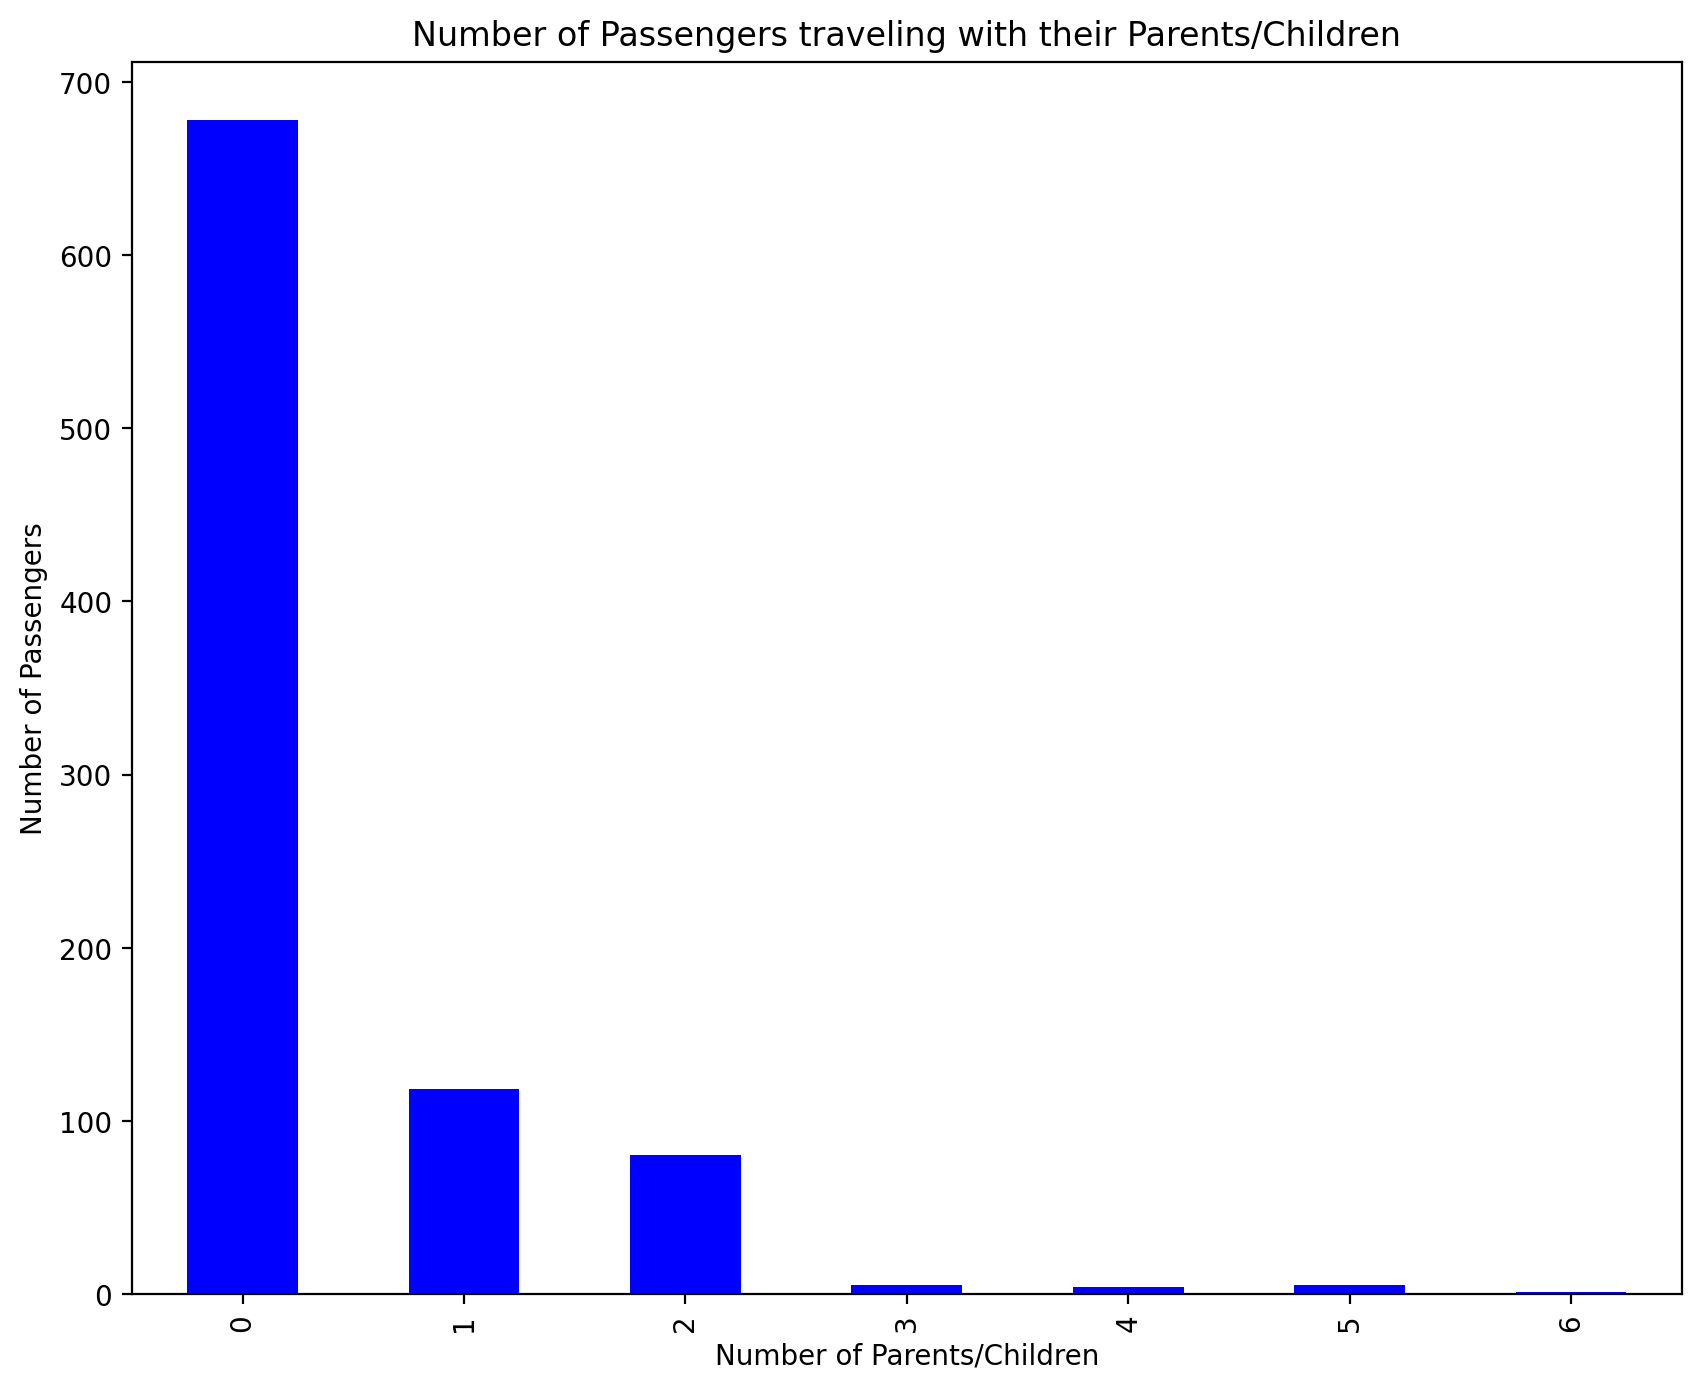

In [42]:
# Bar plot of Number of Passengers traveling with their Parents/Children

parch.plot(kind = "bar", figsize = (10,8), color = 'b')
plt.ylabel("Number of Passengers")
plt.xlabel("Number of Parents/Children")
plt.title("Number of Passengers traveling with their Parents/Children")
plt.show()

**F] Number of Passengers Traveling in Different Socio-Economic Classes**

In [44]:
pclass = df.groupby("Pclass").size()
pclass

,0
Pclass,
1,216
2,184
3,491


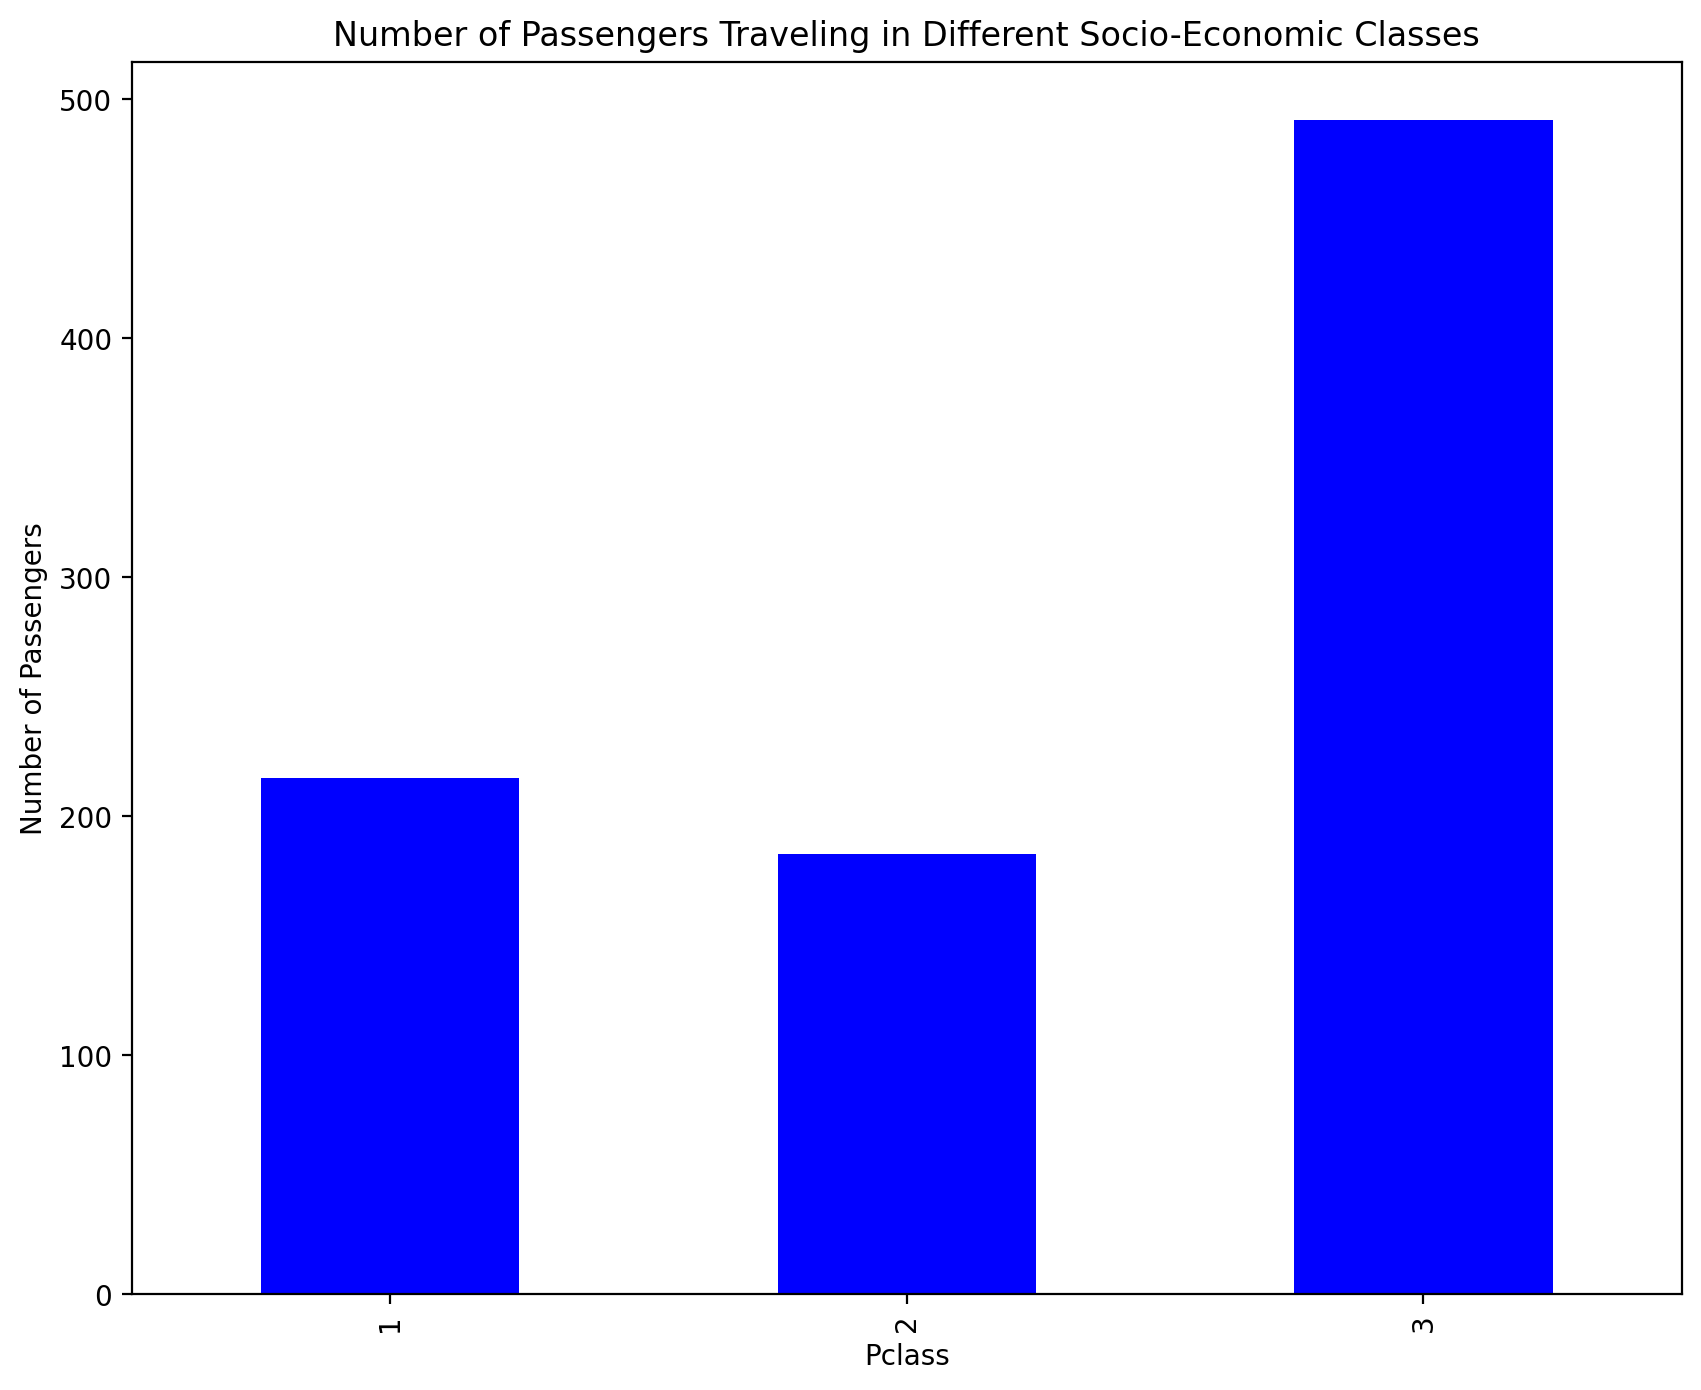

In [48]:
pclass.plot(kind = "bar", figsize = (10,8), color = 'b')
plt.ylabel("Number of Passengers")
plt.xlabel("Pclass")
plt.title("Number of Passengers Traveling in Different Socio-Economic Classes")
plt.show()

**G] Number of Passengers Traveling in Class 1, 2, 3 - Deaths and Survivors**

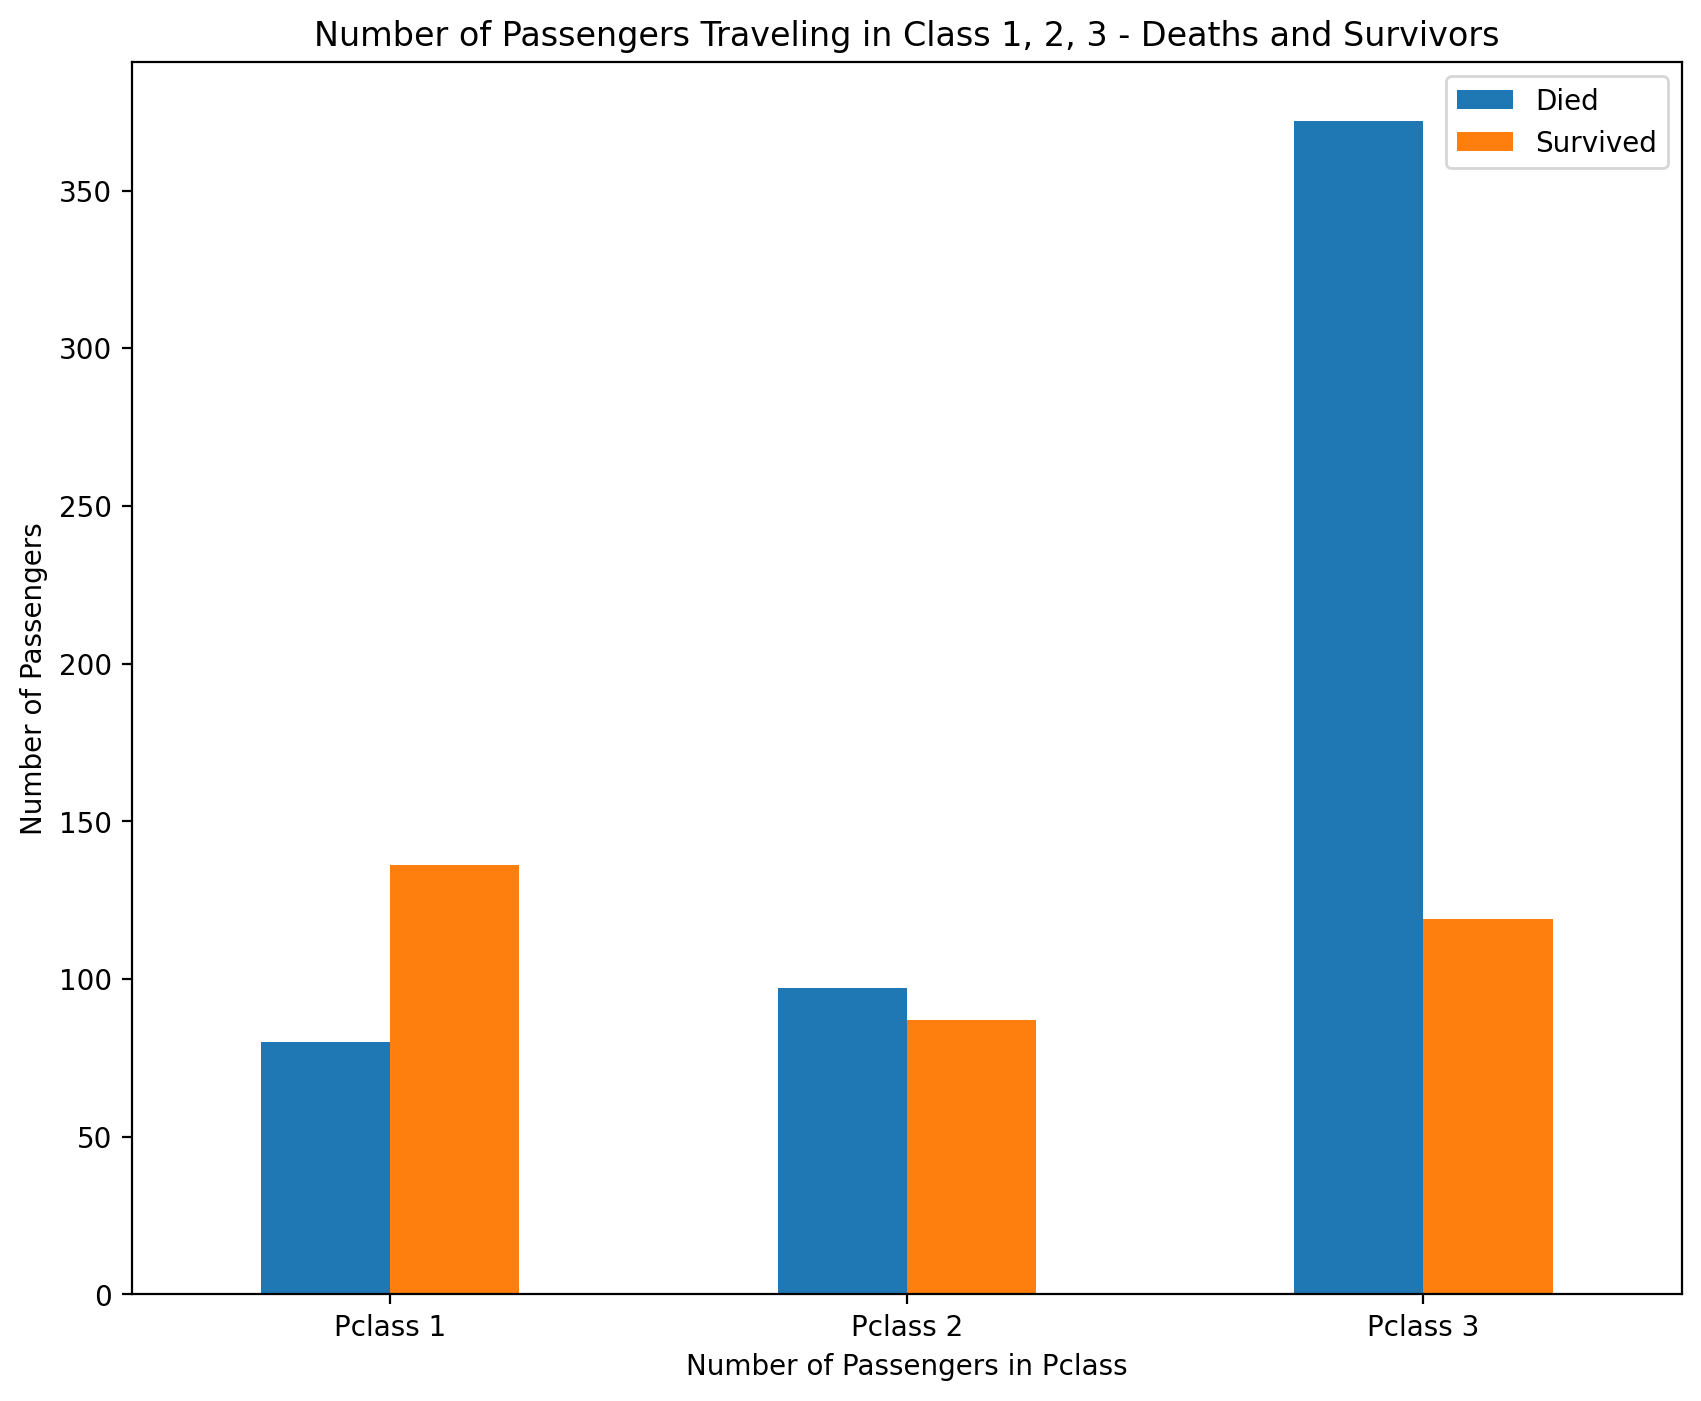

In [50]:
class_survived = df.groupby(["Pclass","Survived"])
class_survived

objects = ('Pclass 1', 'Pclass 2', 'Pclass 3')
bars = np.arange(len(objects))
class_survived.size().unstack().plot(kind = "bar", figsize = (10,8))
plt.xticks(bars, objects, rotation='horizontal')
plt.ylabel("Number of Passengers")
plt.xlabel("Number of Passengers in Pclass")
plt.title("Number of Passengers Traveling in Class 1, 2, 3 - Deaths and Survivors")
plt.legend(['Died', 'Survived'])
plt.show()

**I] Distribution of Survivors with respect to Embarkment**

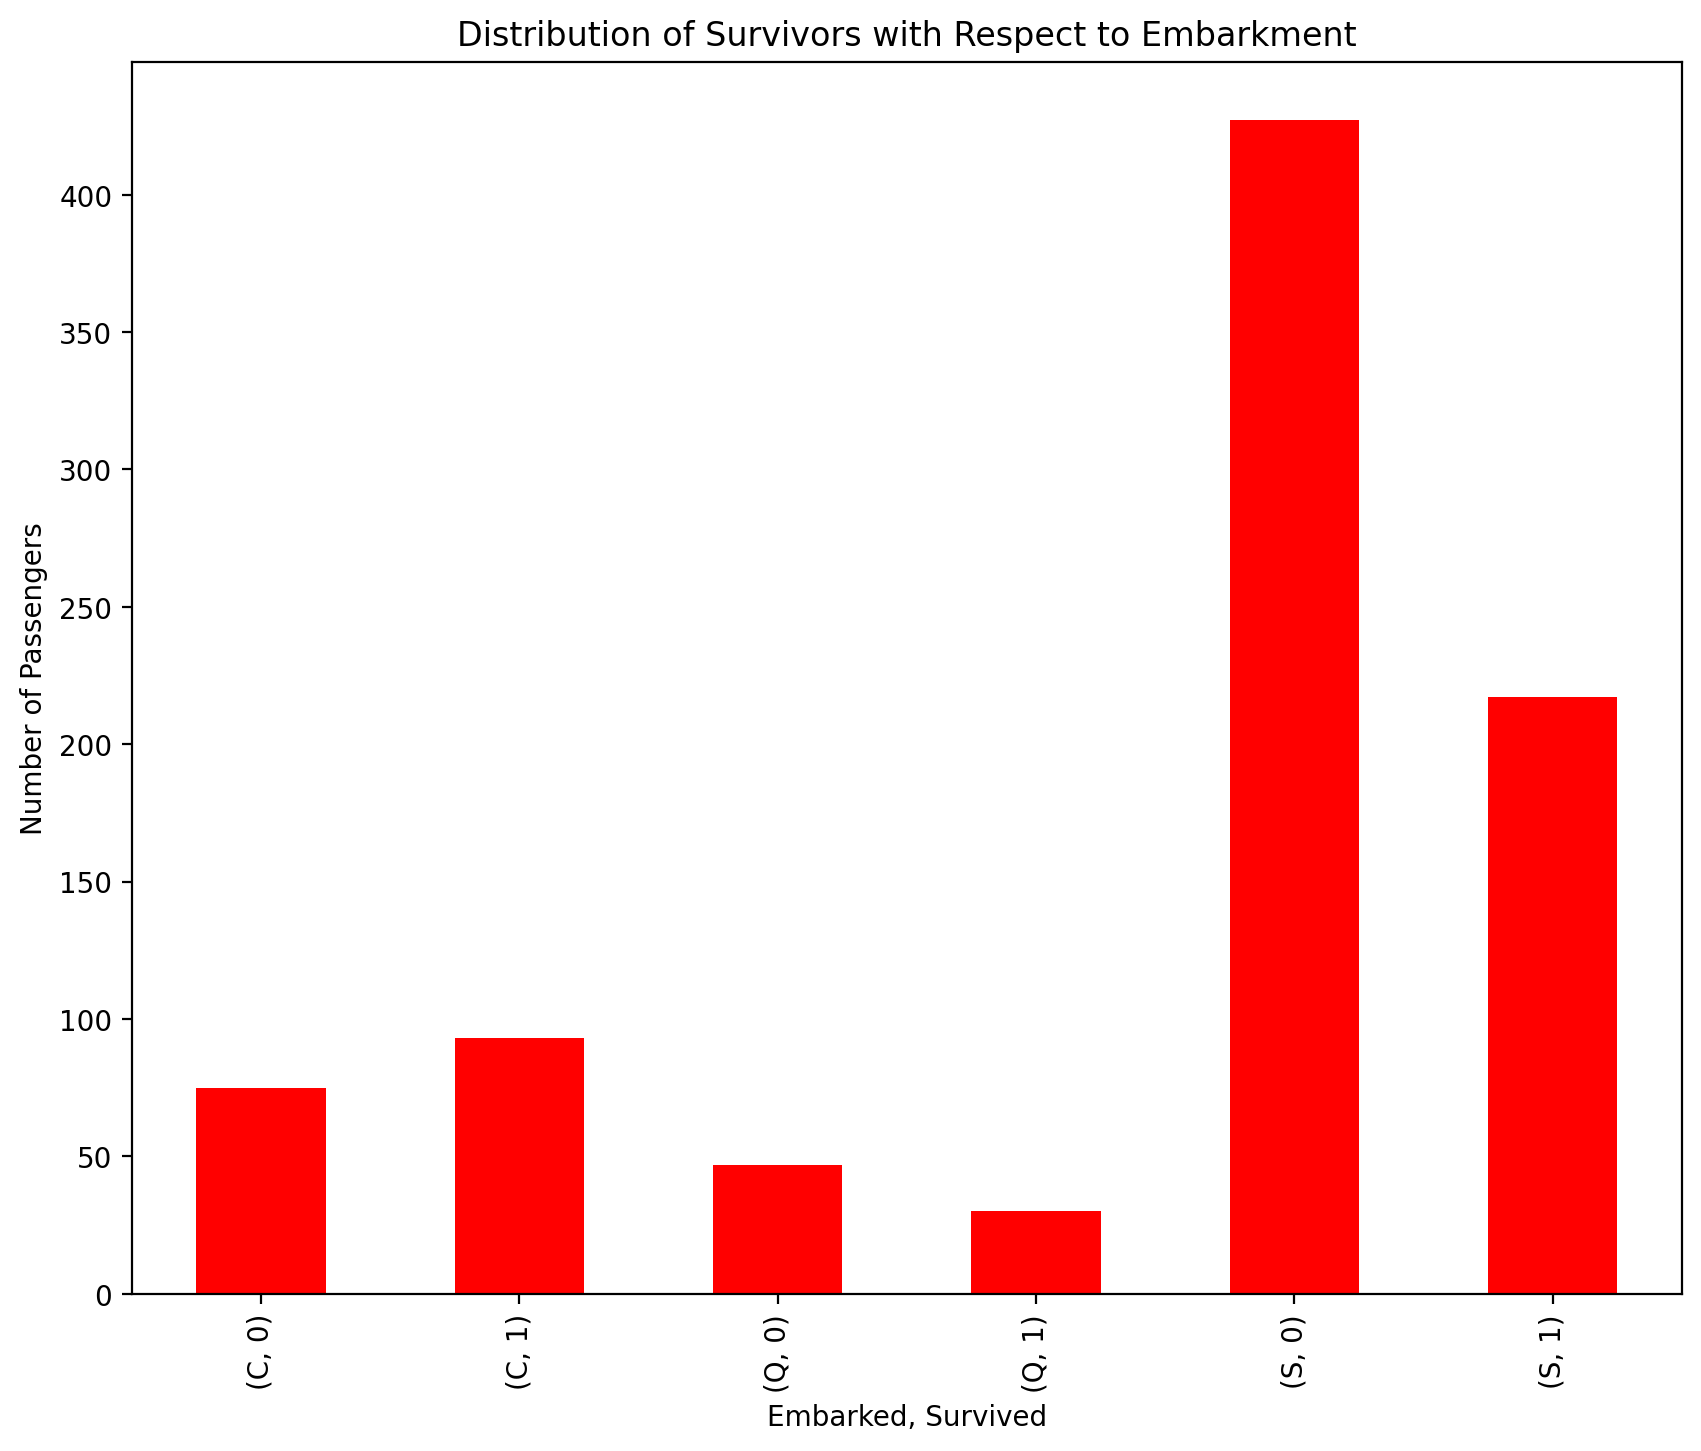

In [54]:
embark_survived = df.groupby(['Embarked', 'Survived']).size()

embark_survived.plot(kind="bar", figsize=(10, 8), color="r")
plt.ylabel("Number of Passengers")
plt.xlabel("Embarked, Survived")
plt.title("Distribution of Survivors with Respect to Embarkment")
plt.show()

**J] Number of Passengers that Died and Survived with respect to the Fare**

<ipython-input-56-0f74048d4069>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Survived", y="Fare", data=df, palette="Set1", width=0.7, fliersize=3, whis=1.5, linewidth=0.5)


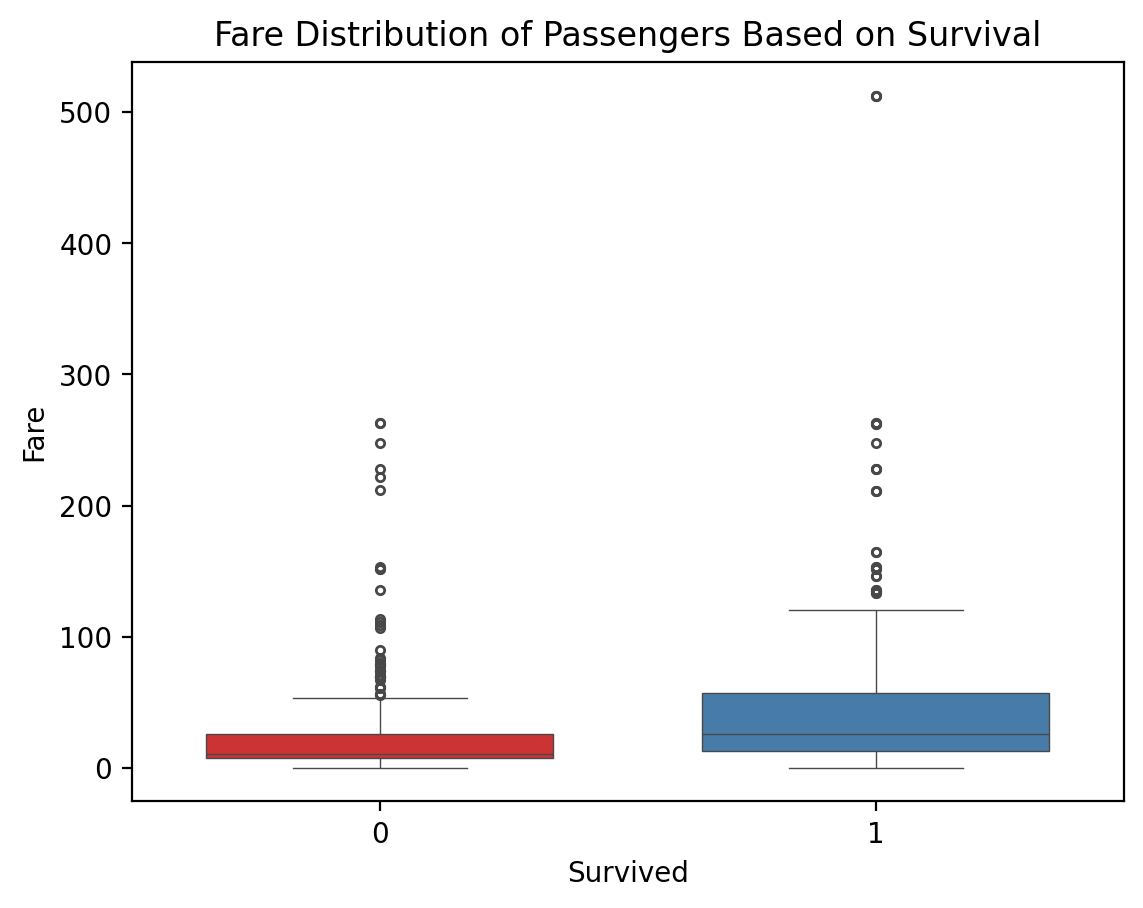

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

fare_survived = df.groupby(['Survived', 'Fare']).size()
fare_survived.head()

ax = sns.boxplot(x="Survived", y="Fare", data=df, palette="Set1", width=0.7, fliersize=3, whis=1.5, linewidth=0.5)
plt.title("Fare Distribution of Passengers Based on Survival")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.show()


**K] Distribution of Deck (Cabin) and Survived**

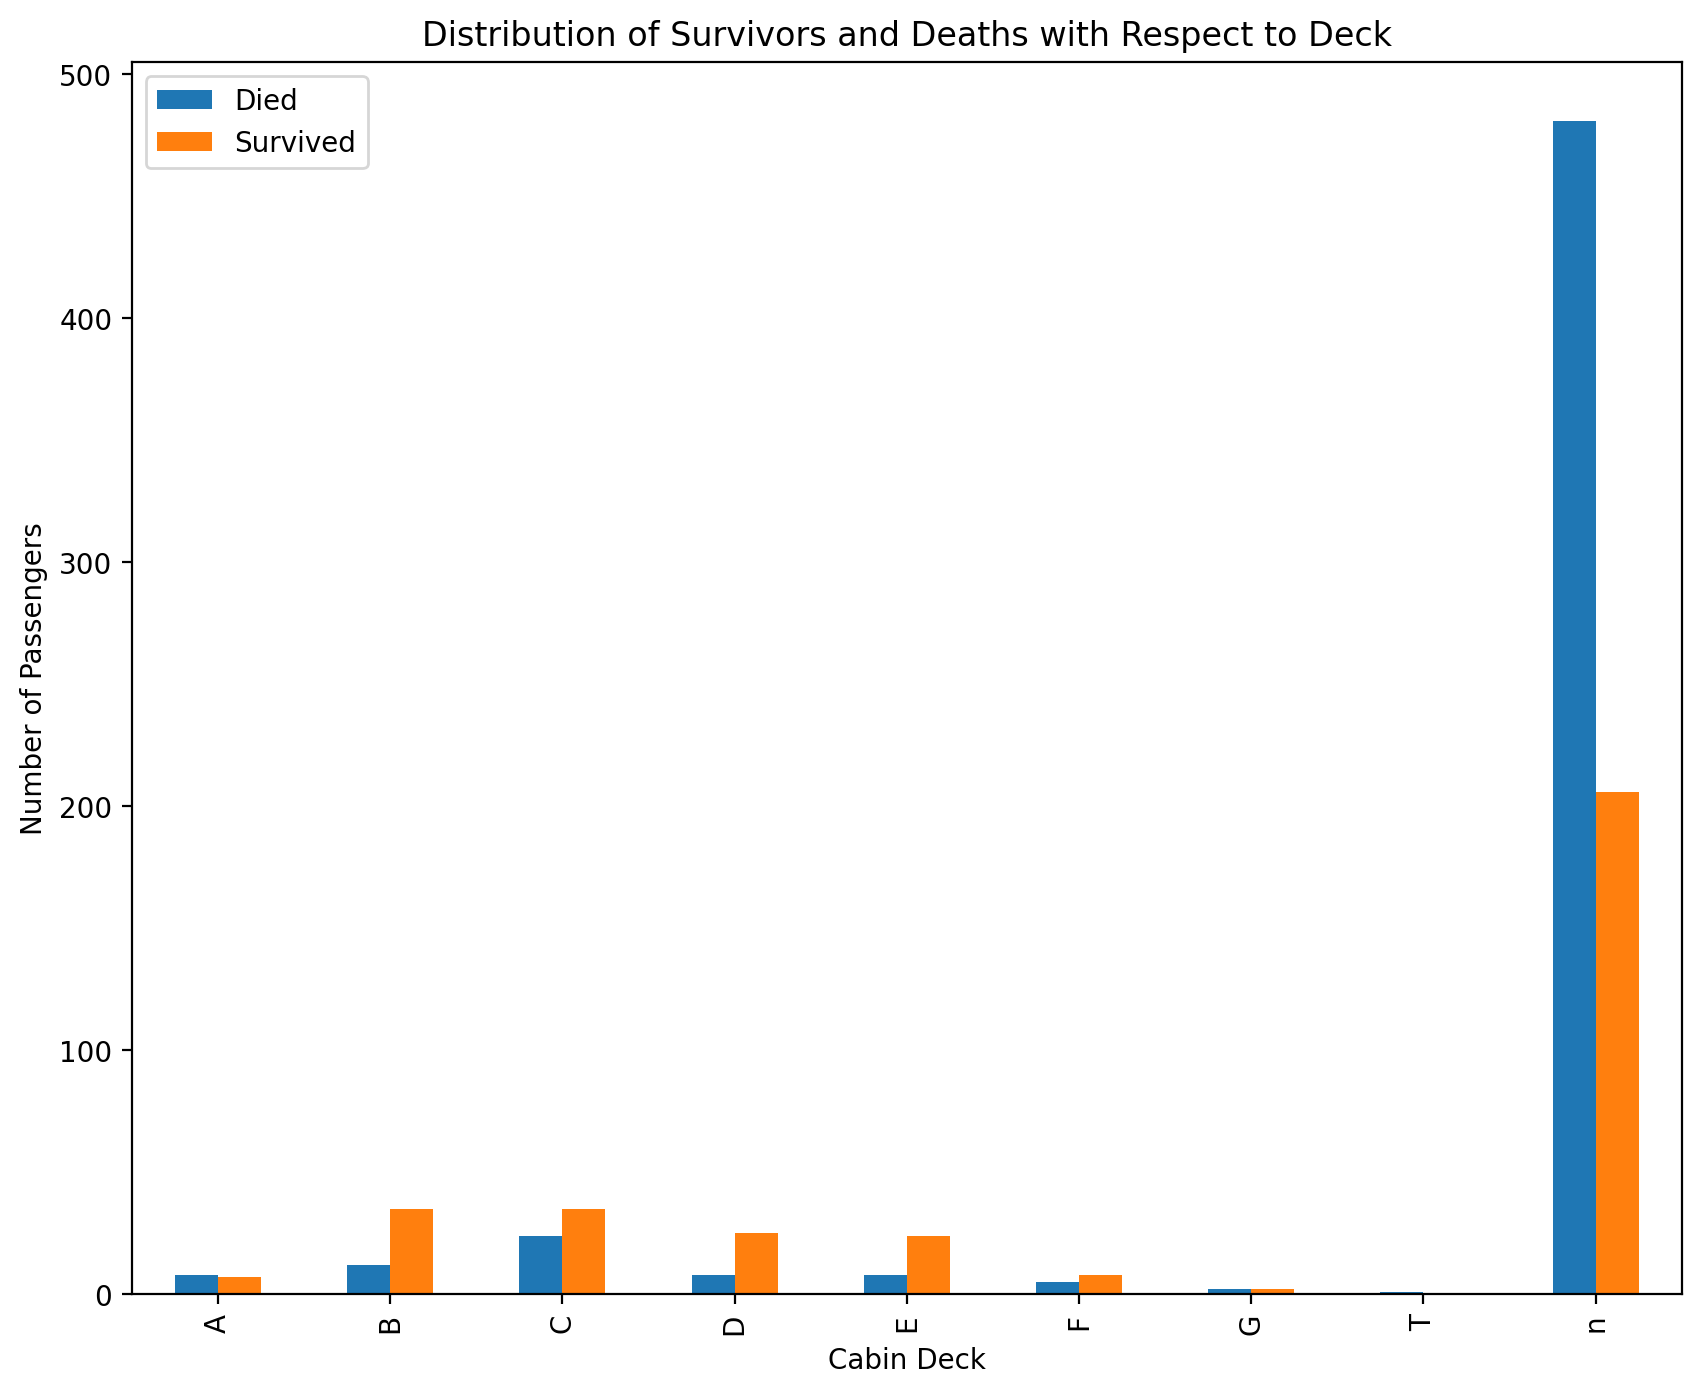

In [57]:
cabin = df.groupby("Cabin").size()
df["Cabin_Deck"] = df["Cabin"].astype(str).str[0]
cabin_deck = df.groupby("Cabin_Deck").size()
cabin_deck_survived = df.groupby(['Cabin_Deck','Survived']).size()
cabin_deck_survived.unstack().plot(kind="bar", figsize=(10,8))
plt.ylabel("Number of Passengers")
plt.xlabel("Cabin Deck")
plt.title("Distribution of Survivors and Deaths with Respect to Deck")
plt.legend(['Died','Survived'])
plt.show()

**L] Distribution of Pclass and Cabin Deck**

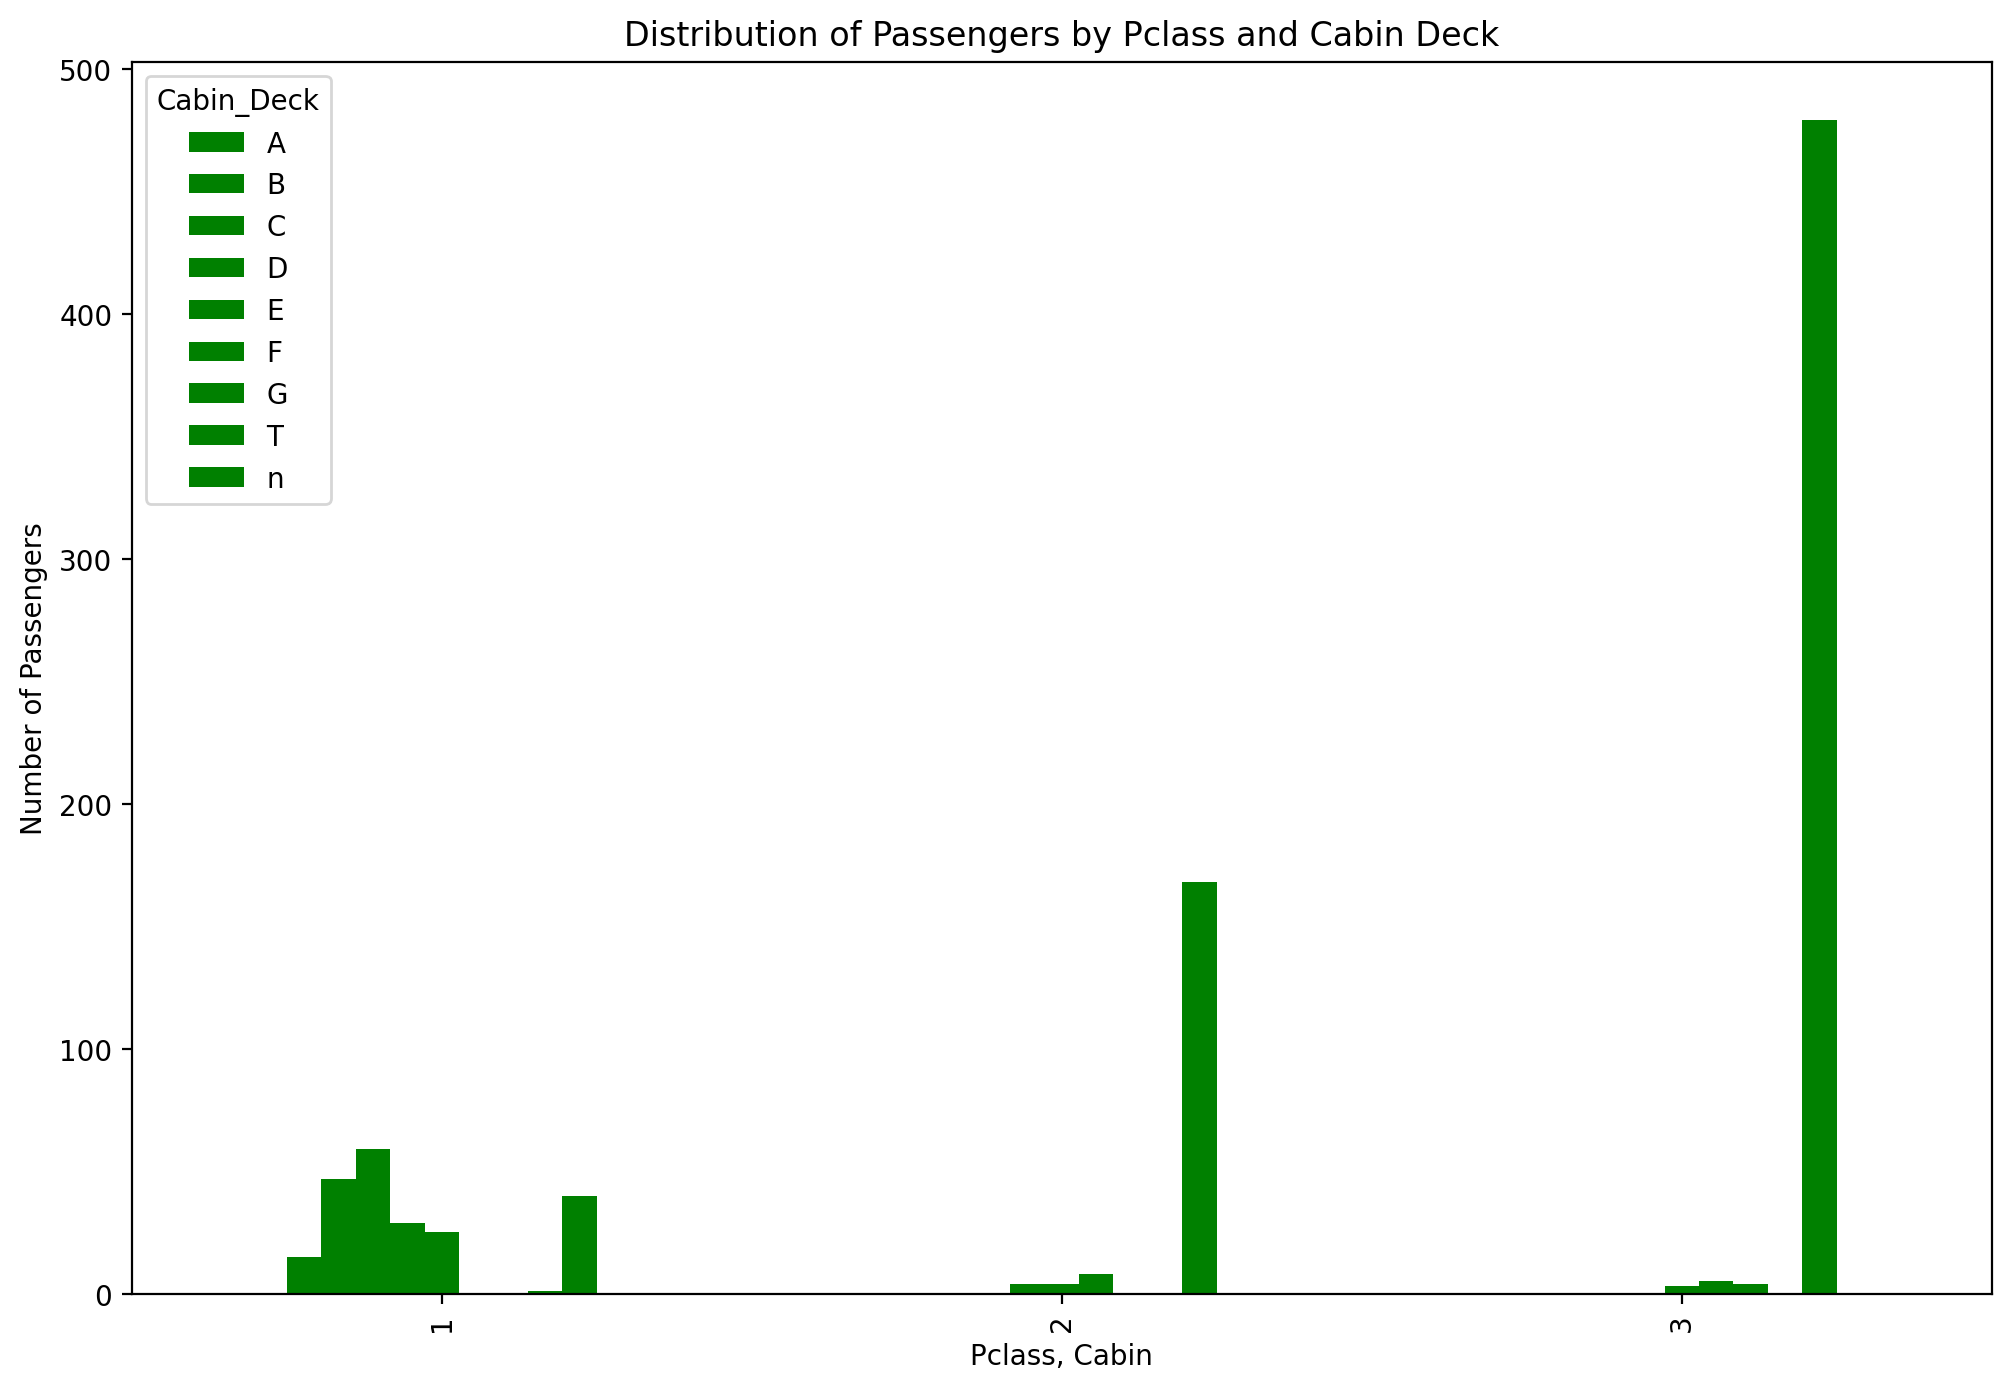

In [58]:
pclass_cabin = df.groupby(['Pclass', 'Cabin_Deck']).size()
pclass_cabin.describe()
pclass_cabin.unstack().plot(kind="bar", figsize=(12,8), color='g')
plt.ylabel("Number of Passengers")
plt.xlabel("Pclass, Cabin")
plt.title("Distribution of Passengers by Pclass and Cabin Deck")
plt.show()